In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\bigdatamart_Train.txt")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### Problem statement
From the above dataframe, (10 stores,1559 products) there are 12 columns which has various attributes of both product and store. 
#### Solution
From this we need to build a model to find the sales of each product at a particular store.

## Statistical inference

In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Out of all these columns, 

##### Product and its attributes
- 'Item_Identifier'
- 'Item_Weight' - Not needed (Each and every item differs - Volume/Quantity)
- 'Item_Fat_Content' - Not needed (Only applicable for food items)
- 'Item_Visibility'
- 'Item_Type'
- 'Item_MRP'

##### Store and its attributes
- 'Outlet_Identifier'
- 'Outlet_Establishment_Year' - Not needed (This does not make any difference)
- 'Outlet_Size'
- 'Outlet_Location_Type'
- 'Outlet_Type' - Not needed (Does not make any difference)

In [5]:
df = df.drop(['Item_Weight', 'Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Type',], axis=1)
df.head(2)

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,FDA15,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,3735.1380
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,443.4228


In [6]:
df.isnull().sum()

Item_Identifier            0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Item_Outlet_Sales          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Visibility       8523 non-null   float64
 2   Item_Type             8523 non-null   object 
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Identifier     8523 non-null   object 
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(3), object(5)
memory usage: 532.8+ KB


- Thre are 2410 null values in outlet_size
- Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Size are of object type, which has to be encoded

Dropping out_size column, since it does not give more importance to the data

In [8]:
df = df.drop(['Outlet_Size'], axis=1)

## Encoding

Using label encoder to encode all the object type columns

In [9]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [10]:
it_ty = lab_enc.fit_transform (df['Item_Type'])
pd.Series(it_ty)
df['Item_Type'] = it_ty

In [11]:
it_id = lab_enc.fit_transform (df['Item_Identifier'])
pd.Series(it_id)
df['Item_Identifier'] = it_id

In [12]:
out_id = lab_enc.fit_transform (df['Outlet_Identifier'])
pd.Series(out_id)
df['Outlet_Identifier'] = out_id

In [13]:
out_loc = lab_enc.fit_transform (df['Outlet_Location_Type'])
pd.Series(out_loc)
df['Outlet_Location_Type'] = out_loc

## Exploratory Data Analysis

Check for correlation, distribution and outliers

#### Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

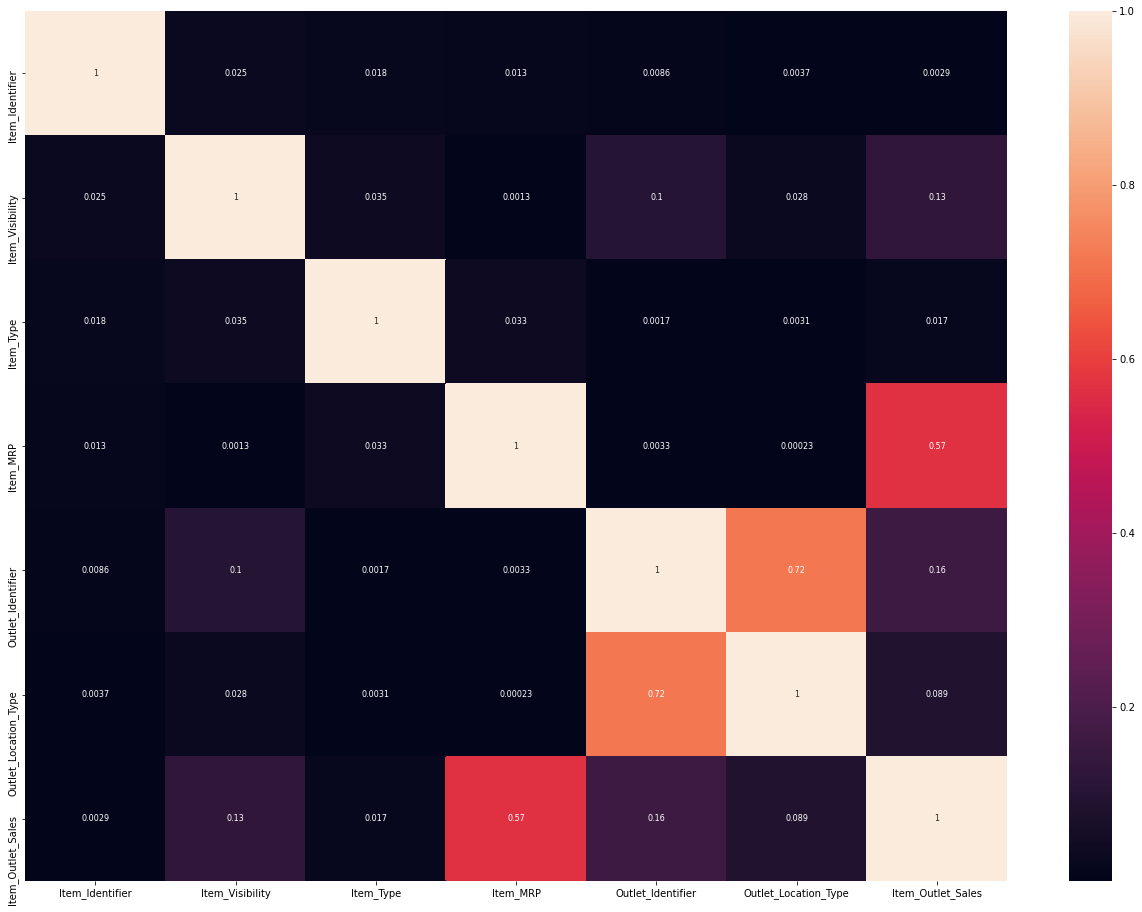

In [14]:
df_corr = df.corr().abs()
plt.figure (figsize = (22,16))
sns.heatmap(df_corr,annot = True, annot_kws = {'size':8}) 
plt.show

No high amount of correlation is encountered

#### Distribution through visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

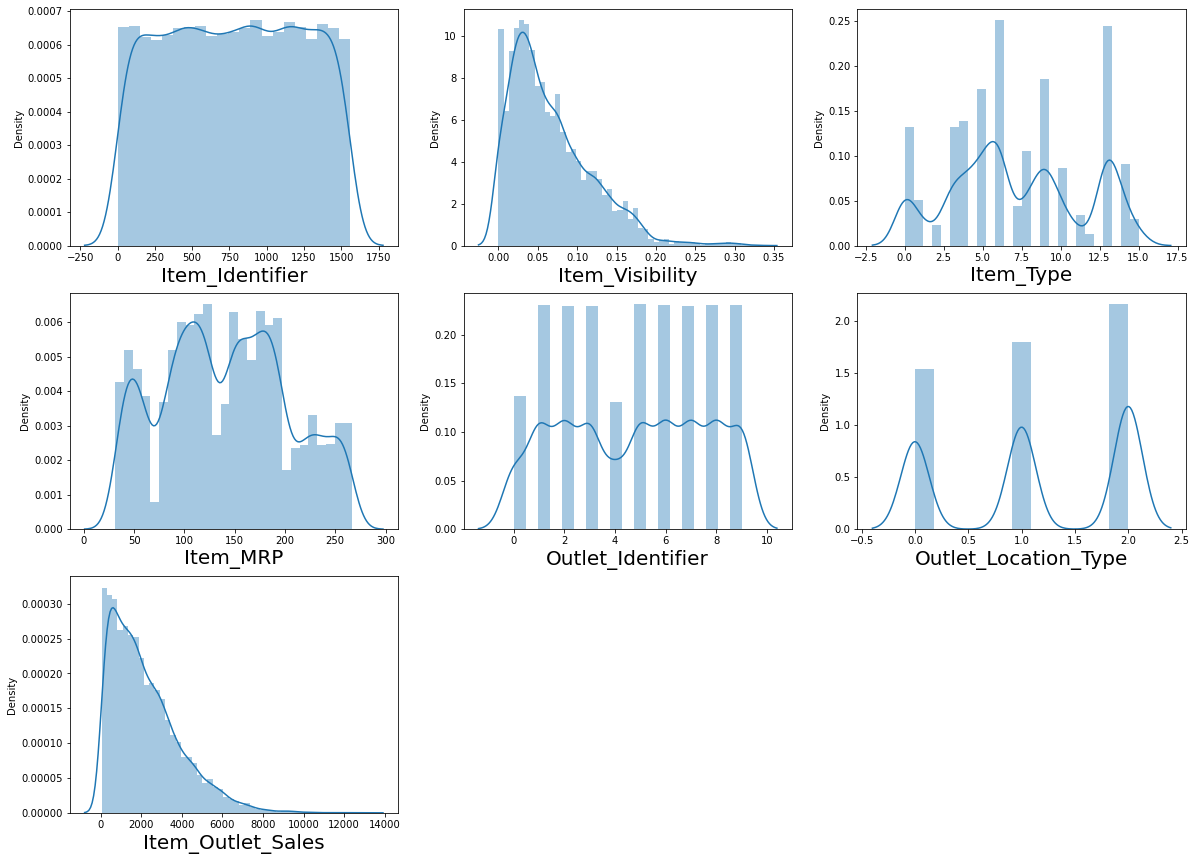

In [15]:
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax =  plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

Item_visibility is skewed and checked for outliers

#### Detecting and treating outliers

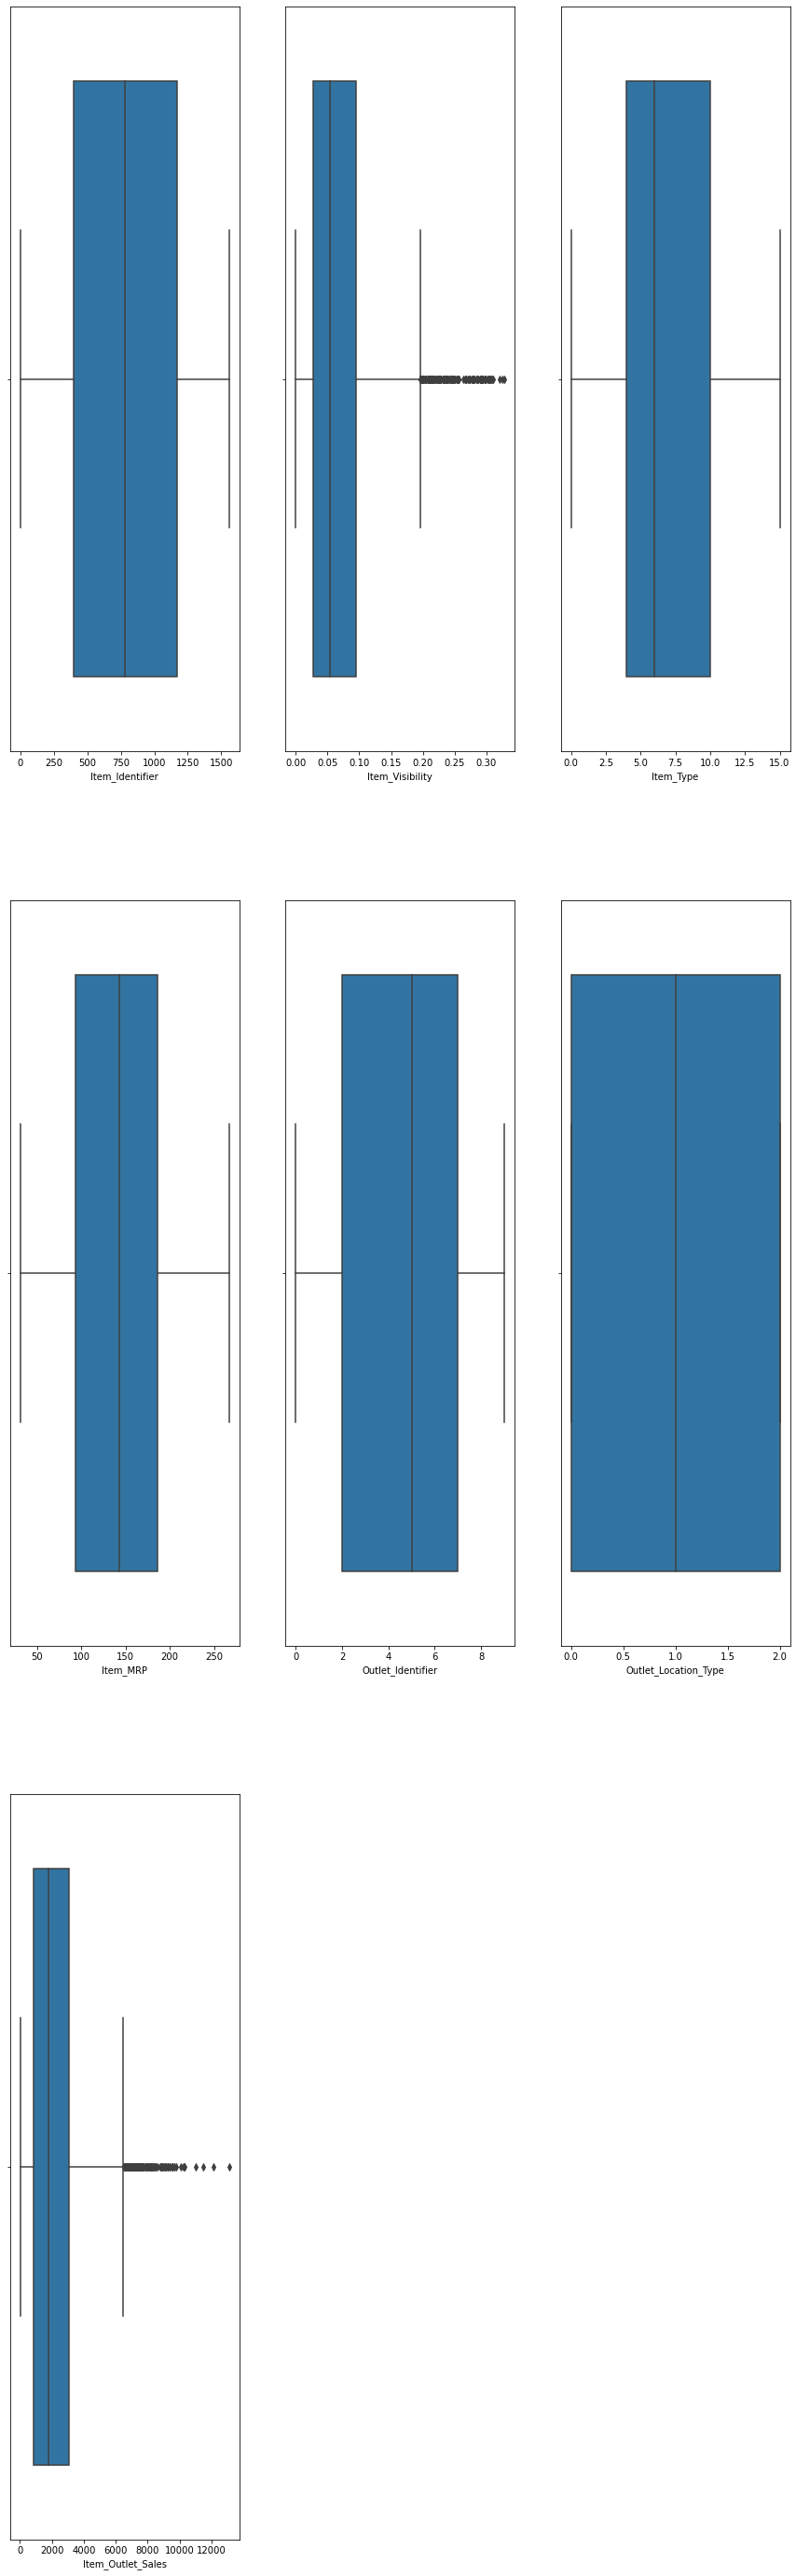

In [16]:
plt.figure(figsize=(15,50))
graph = 1
for column in df:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(df[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

Item_visibility has outliers in higher side

In [17]:
q1 = df.quantile(0.25)
q3 = df.quantile (0.75)
iqr = q3 - q1

vi_high = (q3.Item_Visibility + (1.5*iqr.Item_Visibility))
print (vi_high)

vi_out = np.where(df['Item_Visibility']>vi_high)

df = df.drop(df.index[vi_out])
print(df.shape)

df.reset_index()

0.195979015
(8379, 7)


,index,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Item_Outlet_Sales
0,0,156,0.016047,4,249.8092,9,0,3735.1380
1,1,8,0.019278,14,48.2692,3,2,443.4228
2,2,662,0.016760,10,141.6180,9,0,2097.2700
3,3,1121,0.000000,6,182.0950,0,2,732.3800
4,4,1297,0.000000,9,53.8614,1,2,994.7052
...,...,...,...,...,...,...,...,...
8374,8518,370,0.056783,13,214.5218,1,2,2778.3834
8375,8519,897,0.046982,0,108.1570,7,1,549.2850
8376,8520,1357,0.035186,8,85.1224,6,1,1193.1136
8377,8521,681,0.145221,13,103.1332,3,2,1845.5976


Outlier in Item_visibility is removed

## Model Building

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

### Relationship between independent and dependent variables

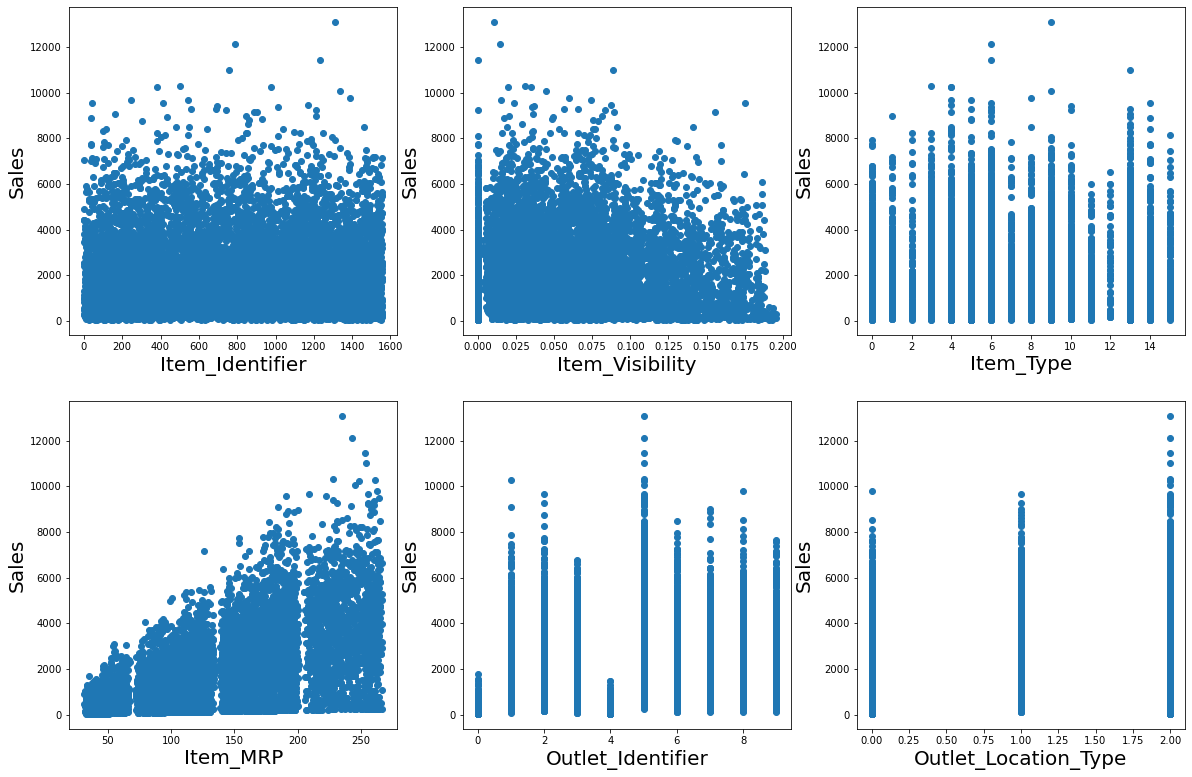

In [20]:
plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Sales', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship looks fairly ok

## Cleaning up the test data

In [21]:
df_test = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\bigdatamart_Test.txt")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [22]:
df_test = df_test.drop(['Item_Weight', 'Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Type','Outlet_Size'], axis=1)

In [23]:
it_ty = lab_enc.fit_transform (df_test['Item_Type'])
pd.Series(it_ty)
df_test['Item_Type'] = it_ty
it_id = lab_enc.fit_transform (df_test['Item_Identifier'])
pd.Series(it_id)
df_test['Item_Identifier'] = it_id
out_id = lab_enc.fit_transform (df_test['Outlet_Identifier'])
pd.Series(out_id)
df_test['Outlet_Identifier'] = out_id
out_loc = lab_enc.fit_transform (df_test['Outlet_Location_Type'])
pd.Series(out_loc)
df_test['Outlet_Location_Type'] = out_loc
df_test.head()

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type
0,1103,0.007565,13,107.8622,9,0
1,1067,0.038428,4,87.3198,2,1
2,1406,0.099575,11,241.7538,0,2
3,809,0.015388,13,155.0340,2,1
4,1184,0.118599,4,234.2300,5,2


In [24]:
df_test.shape

(5681, 6)

#### The test data is imported and cleaned to predict the sales value

In [25]:
x_test = df_test

## Standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
x = scaler.fit_transform(x)

In [28]:
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.73989552, -1.13407715,  1.36691643, -0.53655526,  1.50768894,
        -1.369215  ],
       [ 0.65908503, -0.53185019, -0.76644957, -0.86893692, -0.95974865,
        -0.1388274 ],
       [ 1.42005049,  0.6613164 ,  0.89283509,  1.62984753, -1.66473082,
         1.0915602 ],
       ...,
       [ 1.43351891,  0.15307374,  0.1817131 , -0.36048475,  0.80270677,
        -0.1388274 ],
       [-0.57551969, -1.28168987, -1.00349023,  1.19084433, -0.95974865,
        -0.1388274 ],
       [ 0.47950616,  0.76171558, -1.00349023, -0.99067406,  0.80270677,
        -0.1388274 ]])

In [29]:
type(x_test)
x_test.shape

(5681, 6)

In [30]:
x_test = pd.DataFrame({'Item_Identifier':x_test[:,0],'Item_Visibility':x_test[:,1],'Item_Type':x_test[:,2],'Item_MRP':x_test[:,3],'Outlet_Identifier':x_test[:,4],'Outlet_Location_Type':x_test[:,5]})
x_test

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type
0,0.739896,-1.134077,1.366916,-0.536555,1.507689,-1.369215
1,0.659085,-0.531850,-0.766450,-0.868937,-0.959749,-0.138827
2,1.420050,0.661316,0.892835,1.629848,-1.664731,1.091560
3,0.079943,-0.981416,1.366916,0.226697,-0.959749,-0.138827
4,0.921719,1.032540,-0.766450,1.508110,0.097725,1.091560
...,...,...,...,...,...,...
5676,-1.217514,-1.018333,1.366916,0.004727,1.155198,-1.369215
5677,-1.049159,1.508493,1.840998,0.455014,-0.607258,1.091560
5678,1.433519,0.153074,0.181713,-0.360485,0.802707,-0.138827
5679,-0.575520,-1.281690,-1.003490,1.190844,-0.959749,-0.138827


Thus the data is standardised

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

# Training score
LR = LinearRegression()
LR.fit(x,y)
print(LR.score(x,y))

#Testing score
y_test = LR.predict(x_test)
y_pred = pd.DataFrame({'Predicted_Item_Outlet_Sales':y_test})

0.4342933332614365


In [32]:
x_test.join(y_pred)

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Predicted_Item_Outlet_Sales
0,0.739896,-1.134077,1.366916,-0.536555,1.507689,-1.369215,1938.583883
1,0.659085,-0.531850,-0.766450,-0.868937,-0.959749,-0.138827,600.241713
2,1.420050,0.661316,0.892835,1.629848,-1.664731,1.091560,3258.475305
3,0.079943,-0.981416,1.366916,0.226697,-0.959749,-0.138827,1697.187222
4,0.921719,1.032540,-0.766450,1.508110,0.097725,1.091560,4424.262025
...,...,...,...,...,...,...,...
5676,-1.217514,-1.018333,1.366916,0.004727,1.155198,-1.369215,2215.649996
5677,-1.049159,1.508493,1.840998,0.455014,-0.607258,1.091560,2834.969161
5678,1.433519,0.153074,0.181713,-0.360485,0.802707,-0.138827,2333.229731
5679,-0.575520,-1.281690,-1.003490,1.190844,-0.959749,-0.138827,2685.322917


### Decision tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Training score
dt = DecisionTreeRegressor()
dt.fit(x,y)
print(dt.score(x,y))

#Testing score
y_test = dt.predict(x_test)
y_pred = pd.DataFrame({'Predicted_Item_Outlet_Sales':y_test})
x_test.join(y_pred)

1.0


,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Predicted_Item_Outlet_Sales
0,0.739896,-1.134077,1.366916,-0.536555,1.507689,-1.369215,1965.4416
1,0.659085,-0.531850,-0.766450,-0.868937,-0.959749,-0.138827,713.0718
2,1.420050,0.661316,0.892835,1.629848,-1.664731,1.091560,723.0588
3,0.079943,-0.981416,1.366916,0.226697,-0.959749,-0.138827,620.5256
4,0.921719,1.032540,-0.766450,1.508110,0.097725,1.091560,5359.6900
...,...,...,...,...,...,...,...
5676,-1.217514,-1.018333,1.366916,0.004727,1.155198,-1.369215,4264.4490
5677,-1.049159,1.508493,1.840998,0.455014,-0.607258,1.091560,644.4944
5678,1.433519,0.153074,0.181713,-0.360485,0.802707,-0.138827,843.5686
5679,-0.575520,-1.281690,-1.003490,1.190844,-0.959749,-0.138827,7247.2330


### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Training score
rfr = RandomForestRegressor()
rfr.fit(x,y)
print(rfr.score(x,y))

#Testing score
y_test = rfr.predict(x_test)
y_pred = pd.DataFrame({'Predicted_Item_Outlet_Sales':y_test})
x_test.join(y_pred)

0.9365185269698784


,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Predicted_Item_Outlet_Sales
0,0.739896,-1.134077,1.366916,-0.536555,1.507689,-1.369215,1732.471522
1,0.659085,-0.531850,-0.766450,-0.868937,-0.959749,-0.138827,1230.158712
2,1.420050,0.661316,0.892835,1.629848,-1.664731,1.091560,652.097836
3,0.079943,-0.981416,1.366916,0.226697,-0.959749,-0.138827,2253.260282
4,0.921719,1.032540,-0.766450,1.508110,0.097725,1.091560,5865.804528
...,...,...,...,...,...,...,...
5676,-1.217514,-1.018333,1.366916,0.004727,1.155198,-1.369215,2661.195942
5677,-1.049159,1.508493,1.840998,0.455014,-0.607258,1.091560,2187.186290
5678,1.433519,0.153074,0.181713,-0.360485,0.802707,-0.138827,1944.109368
5679,-0.575520,-1.281690,-1.003490,1.190844,-0.959749,-0.138827,4762.067920


## Cross-Validation

To check whether the model is overfitting or underfitting

In [35]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

LR cvs: 0.4321793707584364
DT cvs: 0.1760339729266085
RFR cvs: 0.5332397749917928


On comparing the model score and cross validation score, Linear Regression fits for the best

## Hyper parameter tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [38]:
params = {'n_estimators': [40,45,55,50], 'learning_rate':[0.30,0.40,0.45,0.8,0.9]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x,y))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45, 0.8,
                                                          0.9],
                                        'n_estimators': [40, 45, 55, 50]})
Best Estimator: AdaBoostRegressor(learning_rate=0.3, n_estimators=40)


In [39]:
from sklearn import metrics

ada = AdaBoostRegressor(base_estimator = dt, learning_rate=0.3,n_estimators=40)
ada.fit(x,y)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.9240981405526079


The accuracy has changed after hyper parameter tuning. So, save adaboostregressor.

## Saving the model

In [40]:
import pickle
filename = 'churn.pkl'
pickle.dump(ada,open(filename,'wb'))

Thus the model is saved